In [45]:
import autograd.numpy as np
import autograd.numpy.random as npr
from autograd import grad
import sklearn.metrics
import pylab

**1.生成数据**

In [63]:
examples = 1000
features = 100
D = (npr.randn(examples,features),npr.randn(examples))

**2. 定义神经网络--层**

In [64]:
layer1_units = 10
layer2_units = 1
w1 = npr.rand(features, layer1_units)
b1 = npr.rand(layer1_units)
w2 = npr.rand(layer1_units, layer2_units)
b2 = 0.0
theta = (w1, b1, w2, b2)

**2.1 定义神经网络--平方损失函数**

In [65]:
def squared_loss(y, y_hat):
    return np.dot((y - y_hat),(y - y_hat))

**2.2 定义神经网络--交叉熵**

In [66]:
def binary_cross_entropy(y, y_hat):
    return np.sum(-((y * np.log(y_hat)) + ((1-y) * np.log(1 - y_hat))))

**3. 封装神经网络**

In [67]:
def neural_network(x, theta):
    w1, b1, w2, b2 = theta
    return np.tanh(np.dot((np.tanh(np.dot(x,w1) + b1)), w2) + b2)

**3.1 封装优化目标函数**

In [68]:
def objective(theta, idx):
    return squared_loss(D[1][idx], neural_network(D[0][idx], theta))

**3.2 更新**

In [69]:
def update_theta(theta, delta, alpha):
    w1, b1, w2, b2 = theta
    w1_delta, b1_delta, w2_delta, b2_delta = delta
    w1_new = w1 - alpha * w1_delta
    b1_new = b1 - alpha * b1_delta
    w2_new = w2 - alpha * w2_delta
    b2_new = b2 - alpha * b2_delta
    new_theta = (w1_new,b1_new,w2_new,b2_new)
    return new_theta

**4.1 计算梯度**

In [70]:
grad_objective = grad(objective)

**5. 训练神经网络**

RMSE before training: 0.548937452163
RMSE after training: 0.492709803734


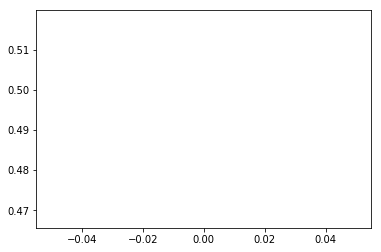

In [75]:
grad_objective = grad(objective)
# Train the Neural Network
epochs = 10
print ("RMSE before training:", sklearn.metrics.mean_squared_error(D[1],neural_network(D[0],
theta)))
rmse = []
for i in range(0, epochs):
    for j in range(0, examples):
        delta = grad_objective(theta, j)
        theta = update_theta(theta,delta, 0.01)
rmse.append(sklearn.metrics.mean_squared_error(D[1],neural_network(D[0], theta)))
print ("RMSE after training:", sklearn.metrics.mean_squared_error(D[1],neural_network(D[0],
theta)))
pylab.plot(rmse)
pylab.show()